   ID  Age Gender  Income  Education Region
0   1   62  Other   96138    Masters   East
1   2   65  Other   76543        PhD   East
2   3   71   Male  138887  Bachelors   East
3   4   18  Other  121643  Bachelors  South
4   5   21   Male  143192    Masters   East
Dataset shape: (1000, 6)


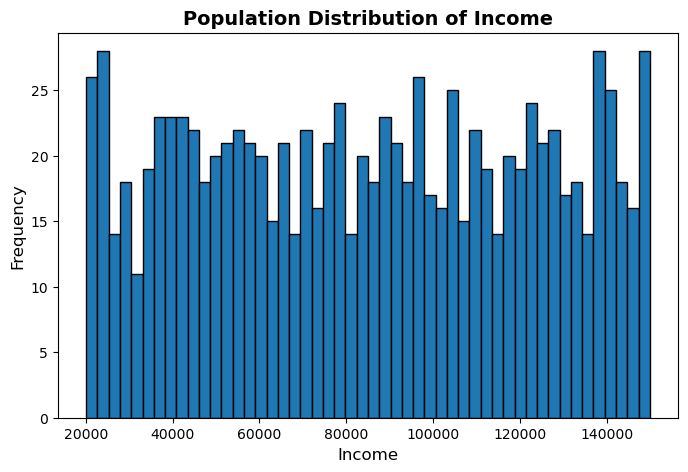

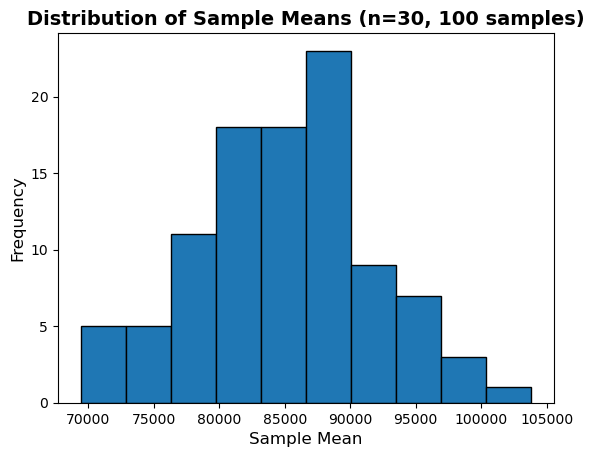

Population Mean = 85147.96
Population Standard Deviation = 38089.51
Standard Error of Mean (n=30) = 6954.16
Mean of Sample Means = 85071.61
Standard Deviation of Sample Means = 6728.56


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

"""
📊 Central Limit Theorem (CLT) Demonstration

The Central Limit Theorem states that:
    - If we take repeated random samples from any population 
      (no matter its distribution), 
    - The distribution of the *sample means* will tend to follow 
      a Normal distribution as the sample size grows larger.

👉 In this example:
- We use a dataset of incomes.
- We visualize the population distribution.
- We then repeatedly take random samples, compute their means, 
  and plot the distribution of these sample means.
- Finally, we compare the sample statistics with the population statistics.
"""

# 1. Load dataset
df = pd.read_csv("Population_Survey_Data.csv")

# Peek at the first few rows
print(df.head())

# Shape of dataset (rows, columns)
print("Dataset shape:", df.shape)

# 2. Visualize the population distribution of "Income"
df["Income"].plot(kind="hist", bins=50, edgecolor="black", figsize=(8, 5))
plt.title("Population Distribution of Income", fontsize=14, weight="bold")
plt.xlabel("Income", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

# 3. Set sample size for CLT demonstration
sample_size = 30  # number of observations in each sample

# 4. Collect sample means
sample_means = []  # list to store mean of each sample

# Repeat process 100 times → take a random sample and compute its mean
for i in range(100):
    df_sample = df["Income"].sample(sample_size)     # take a random sample
    sample_mean_value = df_sample.mean()             # calculate mean of sample
    sample_means.append(sample_mean_value)           # store the sample mean

# 5. Plot the distribution of sample means
plt.hist(sample_means, bins=10, edgecolor="black")
plt.title("Distribution of Sample Means (n=30, 100 samples)", fontsize=14, weight="bold")
plt.xlabel("Sample Mean", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

# 6. Calculate population statistics
population_mean = df["Income"].mean()
population_std = df["Income"].std()

# Standard Error = population_std / sqrt(sample_size)
std_error = population_std / np.sqrt(sample_size)

print(f"Population Mean = {population_mean:.2f}")
print(f"Population Standard Deviation = {population_std:.2f}")
print(f"Standard Error of Mean (n={sample_size}) = {std_error:.2f}")

# 7. Compare sample statistics with population statistics
mean_of_sample_means = np.mean(sample_means)  # average of all sample means
std_of_sample_means = np.std(sample_means)    # std deviation of sample means

print(f"Mean of Sample Means = {mean_of_sample_means:.2f}")
print(f"Standard Deviation of Sample Means = {std_of_sample_means:.2f}")


In [7]:
import numpy as np
from scipy.stats import norm

"""
📊 Hypothesis Testing with Z-Test

Hypothesis testing is a statistical method used to decide whether there is 
enough evidence in a sample of data to infer that a condition is true for 
the entire population.

Steps:
1. State the null hypothesis (H₀) and alternative hypothesis (H₁).
2. Choose a significance level (α, usually 0.05).
3. Compute the test statistic (Z-score).
4. Calculate the p-value.
5. Compare the p-value with α to make a decision:
   - If p-value < α → Reject H₀ (evidence supports H₁).
   - If p-value ≥ α → Fail to reject H₀ (not enough evidence).

---

🧪 Example 1:
A factory claims that its bulbs have an average lifespan of 800 hours. 
We take a sample and test whether the claim holds.

    - Population mean (μ₀) = 800 hours
    - Sample mean (x̄) = 790 hours
    - Sample size (n) = 50
    - Sample standard deviation (s) = 30
"""

# Population parameters (claimed by factory)
population_mean = 800   # μ₀
sample_mean = 790       # x̄
sample_size = 50        # n
sample_std_dev = 30     # s

# Step 1: Calculate Standard Error
se = sample_std_dev / np.sqrt(sample_size)

# Step 2: Calculate Z-score
z_score = (sample_mean - population_mean) / se

# Step 3: Calculate p-value (two-tailed test)
p_value = 2 * norm.cdf(z_score)

# Display results
print("🔹 Example 1: Bulb Lifespan Test")
print(f"Standard Error = {se:.2f}")
print(f"Z-score = {z_score:.2f}")
print(f"P-value = {p_value:.4f}\n")

"""
🧪 Example 2:
We test whether the mean of a population is significantly different 
from 1 when the observed sample mean is 0.98.

    - Population mean (μ₀) = 1
    - Sample mean (x̄) = 0.98
    - Sample size (n) = 40
    - Sample standard deviation (s) = 0.1
"""

# Population parameters
population_mean_2 = 1     # μ₀
sample_mean_2 = 0.98      # x̄
sample_size_2 = 40        # n
sample_std_dev_2 = 0.1    # s

# Step 1: Standard Error
se2 = sample_std_dev_2 / np.sqrt(sample_size_2)

# Step 2: Z-score
z_score2 = (sample_mean_2 - population_mean_2) / se2

# Step 3: P-value (two-tailed)
p_value2 = 2 * norm.cdf(z_score2)

# Display results
print("🔹 Example 2: Mean Comparison Test")
print(f"Standard Error = {se2:.4f}")
print(f"Z-score = {z_score2:.2f}")
print(f"P-value = {p_value2:.4f}")


🔹 Example 1: Bulb Lifespan Test
Standard Error = 4.24
Z-score = -2.36
P-value = 0.0184

🔹 Example 2: Mean Comparison Test
Standard Error = 0.0158
Z-score = -1.26
P-value = 0.2059
